In [1]:
# importing all neccesaary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\santy\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Task 1 - User Overview Analysis 

In [2]:
# upload data
df = pd.read_csv("telcom_data (2).xlsx .san.csv")

<ipython-input-2-cb0508ffcd7d>:2: DtypeWarning: Columns (1,3,9,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("telcom_data (2).xlsx .san.csv")


In [3]:
# checking first few rows
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total(UL+DL)
0,1.310000e+19,04-04-2019 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377
1,1.310000e+19,04-09-2019 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356
2,1.310000e+19,04-09-2019 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973
3,1.310000e+19,04-10-2019 00:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748
4,1.310000e+19,04-12-2019 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403


In [4]:
# Start by identifying the top 10 handsets used by the customers. 
top_10_handsets = df["Handset Type"].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [5]:
#  identify the top 3 handset manufacturers 
top_3_mfg = df["Handset Manufacturer"].value_counts().head(3)
print(top_3_mfg)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [6]:
# identify the top 5 handsets per top 3 handset manufacturer 
top_3 = top_3_mfg.index.tolist()

top_5_handsets_per_mfg = {}
for manufacturer in top_3:
    subset = df[df["Handset Manufacturer"] == manufacturer]
    top_5_handsets = subset["Handset Type"].value_counts().head(5)
    top_5_handsets_per_mfg[manufacturer]= top_5_handsets
    
# top 5 handsets per top 3 handset manufacturer 
for mfg, handsets in top_5_handsets_per_mfg.items():
    print(f" top 5 handsets for {mfg} : {handsets}")

 top 5 handsets for Apple : Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
 top 5 handsets for Samsung : Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
 top 5 handsets for Huawei : Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


#  a short interpretation and recommendation to marketing teams 
so we find out top 10 handsets used by customer and also top 3 manufactures famouns amoung the customers.that will be very easy for us to run device specific and manufactiures market campaign.this is also useful for the customer segmentation.

In [7]:
# Clean and convert numeric columns because all columns should be in nemeric form to get good results.
df['Dur. (ms)'] = pd.to_numeric(df['Dur. (ms)'], errors='coerce')
df['Total UL (Bytes)'] = pd.to_numeric(df['Total UL (Bytes)'], errors='coerce')
df['Total DL (Bytes)'] = pd.to_numeric(df['Total DL (Bytes)'], errors='coerce')

In [8]:
# first we have to add total(UL + DL) Column in data set for that we can simple add TOTAL UL+Totsl DL

In [9]:
# now Aggregate General Session Info per User (MSISDN)
user_sessions = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Total duration
    'Total DL (Bytes)': 'sum', # total doenloaded adat
    'Total UL (Bytes)': 'sum', # total uploaded data
    'Total(UL+DL)': 'sum' #sum of UL and DL
}).rename(columns={
    'Bearer Id': 'xDR_Session_Count',
    'Dur. (ms)': 'Total_Session_Duration',
    'Total DL (Bytes)': 'Total_DL_Data',
    'Total UL (Bytes)': 'Total_UL_Data',
    'Total(UL+DL)': 'Total_Data_Usage'
}).reset_index()

In [10]:
 # now we have all columns read we we can calculte Aggregate Application Data per User
app_columns = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'
]

In [11]:
# we have to Clean application usage columns because many of them not in numeric form
for col in app_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


In [12]:
# Group by user and sum all application usage
user_apps = df.groupby('MSISDN/Number')[app_columns].sum().reset_index()


In [13]:
# now we hAVE TO Merge Session + Application Aggregates
user_behavior = pd.merge(user_sessions, user_apps, on='MSISDN/Number')

In [14]:
#now check results result
print(user_behavior.head())

   MSISDN/Number  xDR_Session_Count  Total_Session_Duration  Total_DL_Data  \
0   3.360100e+10                  1                116720.0   8.426375e+08   
1   3.360100e+10                  1                181230.0   1.207552e+08   
2   3.360100e+10                  1                134969.0   5.566597e+08   
3   3.360101e+10                  1                 49878.0   4.019932e+08   
4   3.360101e+10                  2                 37104.0   1.363130e+09   

   Total_UL_Data  Total_Data_Usage  Social Media DL (Bytes)  \
0     36053108.0         878690574                2206504.0   
1     36104459.0         156859643                2598548.0   
2     39306820.0         595966483                3148004.0   
3     20327526.0         422320698                 251469.0   
4     94280527.0        1457410944                2861230.0   

   Google DL (Bytes)  Email DL (Bytes)  Youtube DL (Bytes)  \
0          3337123.0          837400.0          14900201.0   
1          4197697.0        

In [15]:
# Describe all relevant variables and associated data types (for all this task we have to fill all missing values)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

print(df[numeric_cols].dtypes)

Bearer Id                                   float64
Start ms                                    float64
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mbps (%)                          float64
UL TP < 10 Kbps (%)                         float64
10 Kbps < UL TP < 50 Kbps (%)               float64
50 Kbps < UL

In [16]:
#Analyze the basic metrics (mean, median, etc)

print(df[numeric_cols].describe())

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.692030e+05  169203.000000  169203.000000  1.692030e+05  1.692030e+05   
mean   1.012554e+19     499.188200     498.800880  1.046086e+05  2.082017e+14   
std    2.701361e+18     271.741251     271.257126  7.630063e+04  2.019812e+10   
min    6.920000e+18       0.000000       0.000000  7.142000e+03  2.040470e+14   
25%    7.350000e+18     282.000000     281.000000  6.474500e+04  2.082010e+14   
50%    1.012554e+19     499.188200     498.800880  8.642200e+04  2.082020e+14   
75%    1.300000e+19     717.000000     717.000000  1.223730e+05  2.082020e+14   
max    1.320000e+19     999.000000     999.000000  1.859336e+06  2.140740e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.692030e+05  1.692030e+05    169203.000000    169203.000000   
mean    4.188282e+10  4.847454e+13       109.795706        17.662883   
std     2.296184e+12  2.106583e+13       526.648432   

In [17]:
#Conduct a Non-Graphical Univariate Analysis

univariate_stats = pd.DataFrame({
    'Variance': df[numeric_cols].var(),
    'Standard Deviation': df[numeric_cols].std(),
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})

print(univariate_stats)

                                              Variance  Standard Deviation  \
Bearer Id                                 7.297349e+36        2.701361e+18   
Start ms                                  7.384331e+04        2.717413e+02   
End ms                                    7.358043e+04        2.712571e+02   
Dur. (ms)                                 5.821786e+09        7.630063e+04   
IMSI                                      4.079640e+20        2.019812e+10   
MSISDN/Number                             5.272463e+24        2.296184e+12   
IMEI                                      4.437693e+26        2.106583e+13   
Avg RTT DL (ms)                           2.773586e+05        5.266484e+02   
Avg RTT UL (ms)                           5.192164e+03        7.205667e+01   
Avg Bearer TP DL (kbps)                   5.094329e+08        2.257062e+04   
Avg Bearer TP UL (kbps)                   1.896588e+07        4.354984e+03   
TCP DL Retrans. Vol (Bytes)               1.218441e+16        1.

In [18]:
import sys
!{sys.executable} -m pip install --upgrade threadpoolctl

Requirement already up-to-date: threadpoolctl in c:\users\santy\anaconda3\lib\site-packages (3.5.0)


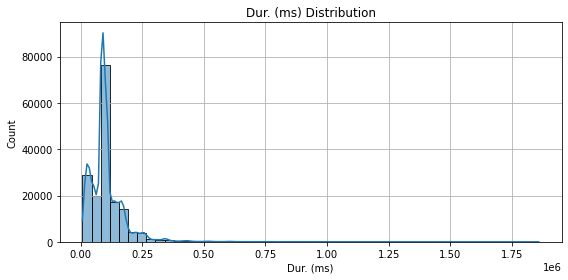

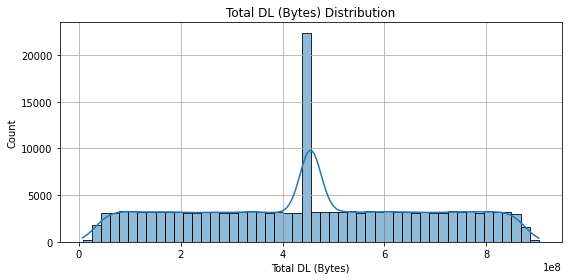

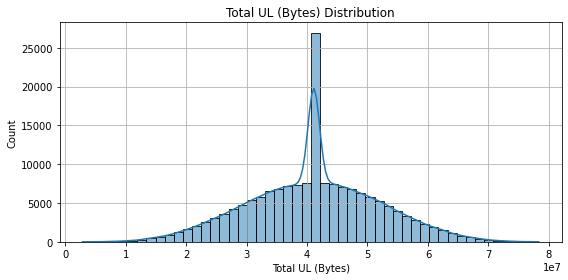

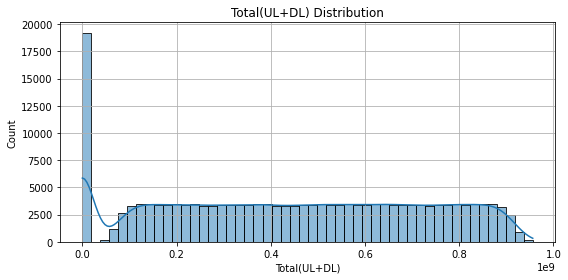

In [19]:
# Conduct a Graphical Univariate Analysis 
for col in ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total(UL+DL)']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
# Bivariate Analysis – explore the relationship between each application & the total(DL+UL)

if 'Application' in df.columns:
    app_traffic = df.groupby('Application')['Total(UL+DL)'].sum().sort_values(ascending=False)
    app_traffic.plot(kind='bar', figsize=(10, 5), title='Total Data Traffic by Application')
    plt.ylabel("Bytes")
    plt.tight_layout()
    plt.show()


In [23]:
#  Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 
if 'Dur. (ms)' in df.columns:
    df['Duration_Decile'] = pd.qcut(df['Dur. (ms)'], 10, labels=False)
    decile_agg = df.groupby('Duration_Decile')['Total(UL+DL)'].sum()
    print(decile_agg)

    decile_agg.plot(kind='bar', title='Total Data Usage per Duration Decile')
    plt.xlabel('Duration Decile')
    plt.ylabel('Total Data (Bytes)')
    plt.tight_layout()
    plt.show()
 


ValueError: Bin edges must be unique: array([   7142.        ,   29849.        ,   51927.2       ,
         84088.6       ,   86399.        ,   86422.        ,
        104608.56034667,  104608.56034667,  139970.8       ,
        175791.2       , 1859336.        ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

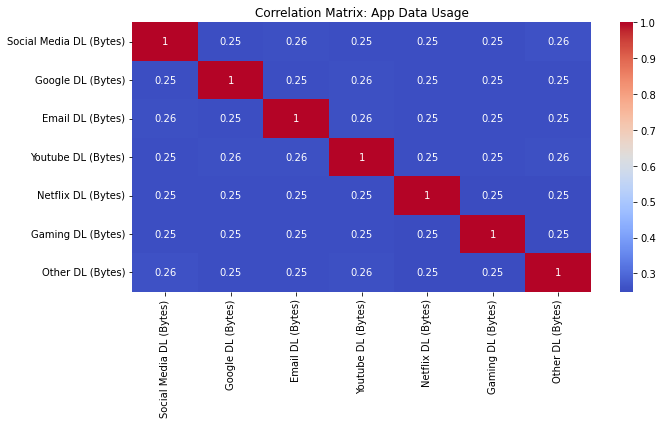

In [24]:
# Correlation Analysis – compute a correlation matrix(for all DL data)

corr_features = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
corr_matrix = df[corr_features].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: App Data Usage")
plt.tight_layout()
plt.show()

In [25]:
#  Dimensionality Reduction – perform a principal component analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_pca = df[corr_features].fillna(0)
X_scaled = StandardScaler().fit_transform(X_pca)

In [26]:
pca = PCA(n_components=2)  # principle component analysis
components = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

[0.36050295 0.10767013]


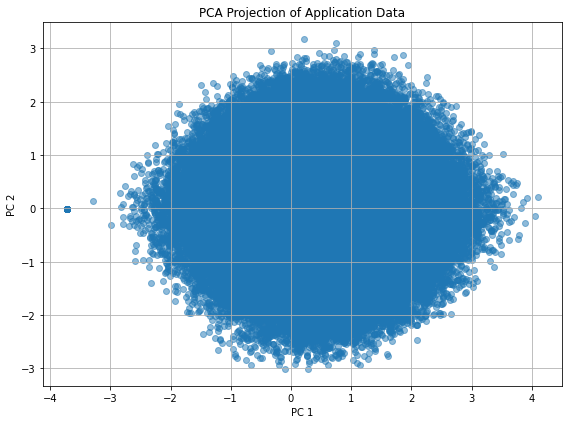

In [27]:
# plotting
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)
plt.title("PCA Projection of Application Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 2 - User Engagement Analysis 

In [28]:
#  track the user’s engagement 
user_engagement = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Session count
    'Dur. (ms)': 'sum',    # Total session duration in minutes
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total(UL+DL)': 'sum'  # Total traffic engamemnt
}).rename(columns={
    'Bearer Id': 'Session_Frequency',
    'Dur. (ms)': 'Total_Session_Duration',
    'Total UL (Bytes)': 'Total_UL_Bytes',
    'Total DL (Bytes)': 'Total_DL_Bytes',
    'Total(UL+DL)': 'Total_Traffic_Bytes'
}).reset_index()

In [29]:
# we wanted to report the top 10 customers per engagement metric
print("Top 10 by Session Frequency:\n", user_engagement.nlargest(10, 'Session_Frequency'))
print("Top 10 by Duration:\n", user_engagement.nlargest(10, 'Total_Session_Duration'))
print("Top 10 by Traffic:\n", user_engagement.nlargest(10, 'Total_Traffic_Bytes'))

Top 10 by Session Frequency:
         MSISDN/Number  Session_Frequency  Total_Session_Duration  \
106853   4.188282e+10              20268            2.081245e+09   
13526    3.362632e+10                 18            8.791927e+06   
6437     3.361489e+10                 17            9.966898e+06   
13180    3.362578e+10                 17            1.855375e+07   
37052    3.365973e+10                 16            4.035428e+06   
76363    3.367588e+10                 15            4.865947e+06   
92923    3.376054e+10                 15            9.279434e+06   
65118    3.366716e+10                 13            8.744914e+06   
666      3.360313e+10                 12            6.287761e+06   
1279     3.360452e+10                 12            5.207990e+06   

        Total_UL_Bytes  Total_DL_Bytes  Total_Traffic_Bytes  
106853    8.339758e+11    9.217441e+12         531248944608  
13526     6.696507e+08    7.301517e+09           7971167261  
6437      6.894830e+08    8.156743e

In [30]:
# Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement. 
X = user_engagement[['Session_Frequency', 'Total_Session_Duration', 'Total_Traffic_Bytes']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
#Cluster Stats
cluster_stats = user_engagement.groupby('Cluster')[['Session_Frequency', 'Total_Session_Duration', 'Total_Traffic_Bytes']].agg(['min', 'max', 'mean', 'sum'])
print("\nCluster Statistics:\n", cluster_stats)


Cluster Statistics:
         Session_Frequency                              Total_Session_Duration  \
                      min    max          mean     sum                    min   
Cluster                                                                         
0                       1      4      1.155990  105254           7.142000e+03   
1                   20268  20268  20268.000000   20268           2.081245e+09   
2                       2     18      2.763746   43681           1.823500e+04   

                                                  Total_Traffic_Bytes  \
                  max          mean           sum                 min   
Cluster                                                                 
0        3.174824e+06  1.171906e+05  1.067032e+10            33249009   
1        2.081245e+09  2.081245e+09  2.081245e+09        531248944608   
2        1.855375e+07  3.130982e+05  4.948517e+09          1056511655   

                                                    

In [33]:
#Aggregate user total traffic per application and derive the top 10 most engaged users per application 
app_columns = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

for col in app_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

app_usage = df.groupby('MSISDN/Number')[app_columns].sum().reset_index()



In [ ]:
conda install numpy scipy scikit_learn --force-reinstall

In [34]:
# Top 10 most engaged users per app
for app in app_columns:
    top_users = app_usage[['MSISDN/Number', app]].nlargest(10, app)
    print(top_users)

        MSISDN/Number  Social Media DL (Bytes)
106853   4.188282e+10             1.937715e+09
13526    3.362632e+10             4.274384e+07
92923    3.376054e+10             3.929765e+07
37052    3.365973e+10             3.490044e+07
6437     3.361489e+10             2.774974e+07
13180    3.362578e+10             2.656412e+07
65118    3.366716e+10             2.375375e+07
106137   3.378632e+10             2.356866e+07
70960    3.366907e+10             2.347705e+07
666      3.360313e+10             2.277668e+07
        MSISDN/Number  Google DL (Bytes)
106853   4.188282e+10       6.007942e+09
13526    3.362632e+10       1.161065e+08
13180    3.362578e+10       1.079047e+08
6437     3.361489e+10       9.394171e+07
37052    3.365973e+10       9.095855e+07
92923    3.376054e+10       8.862653e+07
76363    3.367588e+10       8.300299e+07
106137   3.378632e+10       7.881981e+07
666      3.360313e+10       7.394206e+07
94654    3.376127e+10       7.294980e+07
        MSISDN/Number  Email DL 

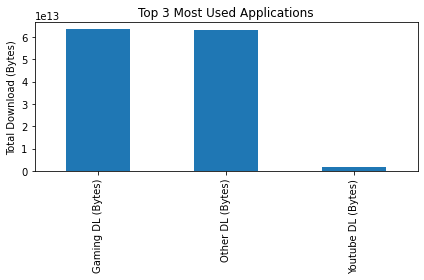

In [35]:
# Plot the top 3 most used applications using appropriate charts. 
app_totals = df[app_columns].sum().sort_values(ascending=False).head(3)
app_totals.plot(kind='bar', title='Top 3 Most Used Applications')
plt.ylabel('Total Download (Bytes)')
plt.tight_layout()
plt.show()

C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

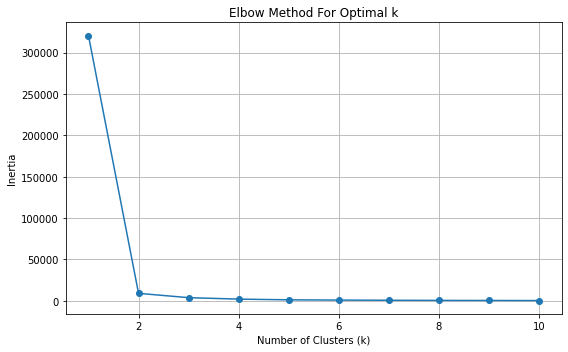

In [40]:
# Elbow Method to find optimal k
inertia= []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 3 - Experience Analytics 

In [41]:
# Compute metrics
experience = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # most frequent handset
}).reset_index()

In [42]:

# Rename columns
experience = experience.rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg_TCP_DL_Retrans',
    'TCP UL Retrans. Vol (Bytes)': 'Avg_TCP_UL_Retrans',
    'Avg RTT DL (ms)': 'Avg_RTT_DL',
    'Avg RTT UL (ms)': 'Avg_RTT_UL',
    'Avg Bearer TP DL (kbps)': 'Avg_TP_DL',
    'Avg Bearer TP UL (kbps)': 'Avg_TP_UL'
})

In [68]:
#  Top, Bottom, Frequent values
print("Top 10 TCP DL Retrans:")
print(df['TCP DL Retrans. Vol (Bytes)'].nlargest(10))

print("Bottom 10 TCP DL Retrans:")
print(df['TCP DL Retrans. Vol (Bytes)'].nsmallest(10))

print("Most Frequent TCP DL Retrans:")
print(df['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10))

Top 10 TCP DL Retrans:
77950     4.294426e+09
135677    4.291380e+09
34636     4.289877e+09
140797    4.289488e+09
3741      4.288060e+09
119667    4.275259e+09
39608     4.268432e+09
76971     4.259997e+09
59011     4.256650e+09
41182     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 TCP DL Retrans:
59708     2.0
125088    2.0
2818      4.0
39582     4.0
52480     4.0
60366     4.0
60417     4.0
75082     4.0
100305    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent TCP DL Retrans:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    107348
1.330000e+03       433
2.660000e+03       219
3.800000e+01       200
9.200000e+01       192
1.318000e+03       156
5.430000e+02       133
3.990000e+03       114
7.600000e+01       108
5.320000e+03       102
Name: count, dtype: int64


In [44]:
# Same for RTT and Throughput
print("\nTop 10 RTT DL:")
print(df['Avg RTT DL (ms)'].nlargest(10))
print("Bottom 10 RTT DL:")
print(df['Avg RTT DL (ms)'].nsmallest(10))
print("Most Frequent RTT DL:")
print(df['Avg RTT DL (ms)'].value_counts().head(10))

print("\nTop 10 Throughput DL:")
print(df['Avg Bearer TP DL (kbps)'].nlargest(10))
print("Bottom 10 Throughput DL:")
print(df['Avg Bearer TP DL (kbps)'].nsmallest(10))
print("Most Frequent Throughput DL:")
print(df['Avg Bearer TP DL (kbps)'].value_counts().head(10))


Top 10 RTT DL:
30155     96923.0
29916     64640.0
17894     55811.0
5963      54847.0
22839     26971.0
23442     26250.0
1361      25873.0
81256     25602.0
97312     25374.0
100575    24733.0
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 RTT DL:
42602     0.0
52217     0.0
60143     0.0
61144     0.0
61337     0.0
103321    0.0
124538    0.0
142526    0.0
143878    0.0
71738     2.0
Name: Avg RTT DL (ms), dtype: float64
Most Frequent RTT DL:
Avg RTT DL (ms)
109.795706    47031
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
26.000000      2488
Name: count, dtype: int64

Top 10 Throughput DL:
120876    378160.0
141250    299257.0
143670    299002.0
149616    276040.0
92177     269362.0
117776    266332.0
115836    265440.0
89567     264448.0
116550    263047.0
41551     254253.0
Name: Avg Bearer TP DL (kbps), dtype: float64
Bottom 10 Throughput DL:
13      0.0
148     0.

<ipython-input-45-c498ec284495>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


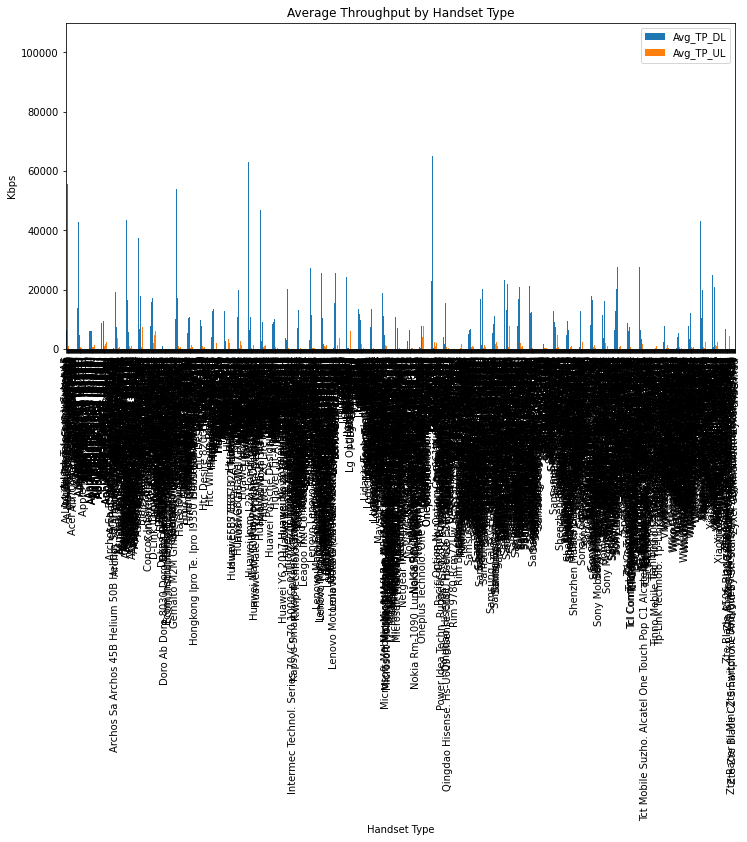

<ipython-input-45-c498ec284495>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


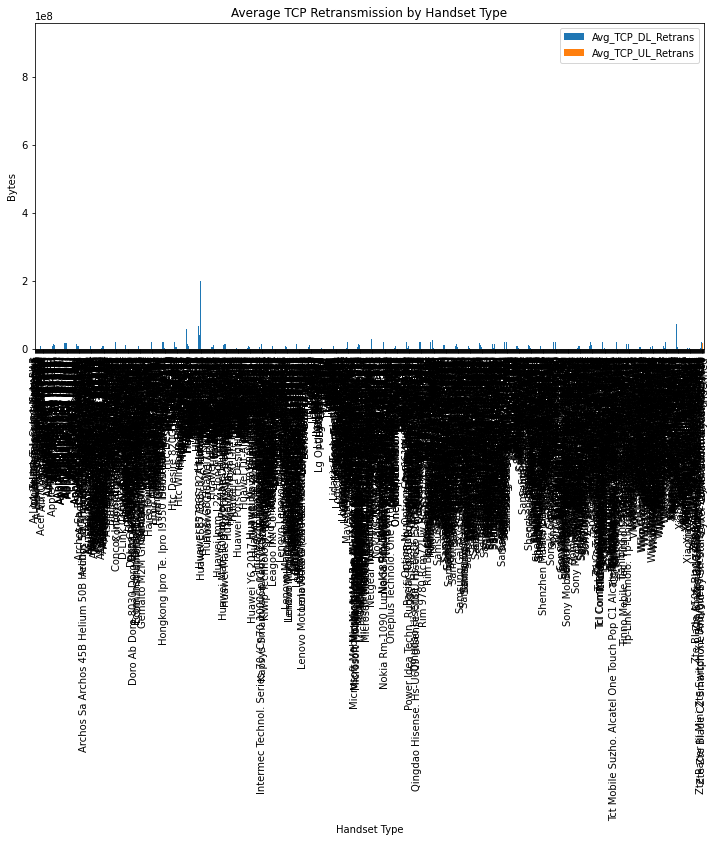

In [45]:
# Distribution by Handset Type
throughput_by_handset = experience.groupby('Handset Type')[['Avg_TP_DL', 'Avg_TP_UL']].mean()
throughput_by_handset.plot(kind='bar', figsize=(12, 6), title='Average Throughput by Handset Type')
plt.ylabel('Kbps')
plt.tight_layout()
plt.show()

tcp_by_handset = experience.groupby('Handset Type')[['Avg_TCP_DL_Retrans', 'Avg_TCP_UL_Retrans']].mean()
tcp_by_handset.plot(kind='bar', figsize=(12, 6), title='Average TCP Retransmission by Handset Type')
plt.ylabel('Bytes')
plt.tight_layout()
plt.show()

In [46]:
# K-Means Clustering on Experience Metrics
X_exp = experience[['Avg_TCP_DL_Retrans', 'Avg_TCP_UL_Retrans', 'Avg_RTT_DL', 'Avg_RTT_UL', 'Avg_TP_DL', 'Avg_TP_UL']]
X_scaled = StandardScaler().fit_transform(X_exp)

kmeans = KMeans(n_clusters=3, random_state=42)
experience['Experience_Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Task 4 - Satisfaction Analysis 

In [47]:
# # Describe clusters
cluster_summary = experience.groupby('Experience_Cluster')[['Avg_TCP_DL_Retrans', 'Avg_TCP_UL_Retrans', 'Avg_RTT_DL', 'Avg_RTT_UL', 'Avg_TP_DL', 'Avg_TP_UL']].mean()
print("\nExperience Cluster Summary:")
print(cluster_summary)


Experience Cluster Summary:
                    Avg_TCP_DL_Retrans  Avg_TCP_UL_Retrans  Avg_RTT_DL  \
Experience_Cluster                                                       
0                         4.767033e+07        9.913444e+05   79.325120   
1                         1.576205e+07        6.173393e+05  124.057755   
2                         1.221375e+08        1.806782e+09  113.187500   

                    Avg_RTT_UL     Avg_TP_DL     Avg_TP_UL  
Experience_Cluster                                          
0                    35.956153  51708.731955   8106.479885  
1                    13.771096   5312.748824    479.620484  
2                    36.625000  73006.687500  15126.937500  


In [53]:
# rename column name
user_engagement.rename(columns={"MSISDN/Number": "MSISDN"}, inplace=True)
experience.rename(columns={"MSISDN/Number": "MSISDN"}, inplace=True)

In [54]:
# first we have to merge user engagement and user experince
merged_df = pd.merge(user_engagement, experience, on='MSISDN')


In [56]:
# Engagement Score - distance from least engaged cluster center
engagement_features = ['Session_Frequency', 'Total_Session_Duration', 'Total_Traffic_Bytes']
X_eng = StandardScaler().fit_transform(merged_df[engagement_features])
kmeans_eng = KMeans(n_clusters=3, random_state=42).fit(X_eng)
merged_df['Engagement_Cluster'] = kmeans_eng.labels_

C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
# Identify lowest engagement cluster (lowest mean total traffic)
from sklearn.metrics.pairwise import euclidean_distances  # for this task we have to use ecludian distance
centroids_eng = kmeans_eng.cluster_centers_
low_eng_cluster = np.argmin(centroids_eng[:, 2])
merged_df['Engagement_Score'] = euclidean_distances(X_eng, [centroids_eng[low_eng_cluster]]).flatten()


In [70]:
# Experience Score - distance from worst experience cluster center
experience_features = ['Avg_TCP_DL_Retrans', 'Avg_TCP_UL_Retrans', 'Avg_RTT_DL', 'Avg_RTT_UL', 'Avg_TP_DL', 'Avg_TP_UL']
X_exp = StandardScaler().fit_transform(merged_df[experience_features])
kmeans_exp = KMeans(n_clusters=3, random_state=42).fit(X_exp)
merged_df['Experience_Cluster'] = kmeans_exp.labels_


C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [61]:
# Identify worst experience cluster (highest mean RTT + lowest TP)
centroids_exp = kmeans_exp.cluster_centers_
worst_exp_cluster = np.argmax(centroids_exp[:, [2, 3]].mean(axis=1))
merged_df['Experience_Score'] = euclidean_distances(X_exp, [centroids_exp[worst_exp_cluster]]).flatten()


In [62]:
 # Satisfaction Score = average of both
merged_df['Satisfaction_Score'] = (merged_df['Engagement_Score'] + merged_df['Experience_Score']) / 2

In [63]:
# # Top 10 most satisfied users (lowest score)
print("Top 10 Satisfied Users:")
print(merged_df.nsmallest(10, 'Satisfaction_Score')[['MSISDN', 'Satisfaction_Score']])


Top 10 Satisfied Users:
              MSISDN  Satisfaction_Score
57181   3.366470e+10            2.821438
58664   3.366509e+10            4.625707
70913   3.366905e+10           21.380780
100005  3.376359e+10           26.171590
45158   3.366168e+10           40.740317
85123   3.369838e+10           43.778274
69068   3.366845e+10           51.602209
55835   3.366431e+10           54.319922
38577   3.366009e+10           54.544166
30175   3.365825e+10           55.549455


In [65]:
# now we yhave to use Regression model to predict satisfaction
from sklearn.linear_model import LinearRegression
model_features = engagement_features + experience_features
X = merged_df[model_features]
y = merged_df['Satisfaction_Score']

model = LinearRegression()
model.fit(X, y)
print("Regression R^2:", model.score(X, y))
print("Regression Coefficients:", dict(zip(model_features, model.coef_)))


Regression R^2: 0.9685005505012074
Regression Coefficients: {'Session_Frequency': -0.0005705806522070062, 'Total_Session_Duration': 9.725673127397066e-08, 'Total_Traffic_Bytes': 1.662366447714213e-10, 'Avg_TCP_DL_Retrans': 4.098350439448471e-10, 'Avg_TCP_UL_Retrans': -3.226587908480266e-08, 'Avg_RTT_DL': 0.00016574168812114642, 'Avg_RTT_UL': 0.000709211989610998, 'Avg_TP_DL': -8.847583729492476e-08, 'Avg_TP_UL': -2.1347684975037024e-06}


In [66]:
#  k-means (k=2) on the engagement & the experience score. 
score_features = merged_df[['Engagement_Score', 'Experience_Score']]
kmeans_sat = KMeans(n_clusters=2, random_state=42)
merged_df['Satisfaction_Cluster'] = kmeans_sat.fit_predict(score_features)


C:\Users\santy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
# Aggregate Satisfaction & Experience Score per Cluster
cluster_summary = merged_df.groupby('Satisfaction_Cluster')[['Satisfaction_Score', 'Experience_Score']].mean()
print("\nSatisfaction Cluster Summary:")
print(cluster_summary)


Satisfaction Cluster Summary:
                      Satisfaction_Score  Experience_Score
Satisfaction_Cluster                                      
0                              72.688994        145.173519
1                             351.666353        145.151777
